In [6]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.colors as colors
plt.style.use(plt.style.available[11])

In [7]:
grids = [None, None, None, None]
for i in range(len(grids)):
    with open('nn_cv_results/grid_search_{}.pkl'.format(i+1), 'rb') as f:
        grids[i] = pickle.load(f)

In [9]:
scores = []
pairs = []
stds = []
pairs_str = []
for i in range(len(grids)):
    len_grid = len(grids[i]['params'])
    scores += list(grids[i]['mean_test_score'])
    stds += list(grids[i]['std_test_score'])
    pairs += [(i+1, grids[i]['params'][j]['module__n_neurons']) for j in range(len_grid)]
    pairs_str += ['({}, {})'.format(i+1, grids[i]['params'][j]['module__n_neurons']) for j in range(len_grid)]
scores = np.array(scores)
stds = np.array(stds)
pairs = np.array(pairs, dtype=np.dtype([('field1', int), ('field2', int)]))
pairs_str = np.array(pairs_str, dtype=str)
print(scores)
print(stds)
print(pairs)
print(pairs_str)

[-0.04715955 -0.04685428 -0.04690458 -0.04703371 -0.047027   -0.04812756
 -0.04995422 -0.02282338 -0.00914539 -0.00690296 -0.00681075 -0.00920454
 -0.00851667 -0.00614048 -0.00550767 -0.00688835 -0.00817108 -0.00609176
 -0.00561684]
[0.00199778 0.00191886 0.00179563 0.00165935 0.00199589 0.00310233
 0.0028734  0.00934709 0.00100855 0.00032388 0.00050654 0.0011248
 0.00114963 0.00022736 0.0001006  0.00167349 0.00062942 0.00014498
 0.00017483]
[(1,   16) (1,   32) (1,   64) (1,  128) (1,  256) (1,  512) (1, 1024)
 (2,   16) (2,   32) (2,   64) (2,  128) (2,  256) (3,   16) (3,   32)
 (3,   64) (3,  128) (4,   16) (4,   32) (4,   64)]
['(1, 16)' '(1, 32)' '(1, 64)' '(1, 128)' '(1, 256)' '(1, 512)'
 '(1, 1024)' '(2, 16)' '(2, 32)' '(2, 64)' '(2, 128)' '(2, 256)' '(3, 16)'
 '(3, 32)' '(3, 64)' '(3, 128)' '(4, 16)' '(4, 32)' '(4, 64)']


In [10]:
def n_params(n_layers, n_neurons):
    return 3 + 7*n_neurons + n_neurons*(n_neurons+1)*(n_layers-1)

In [11]:
weights = np.array([n_params(*pairs[i:i+1][0]) for i in range(len(pairs))])
print(weights)

[  115   227   451   899  1795  3587  7171   387  1283  4611 17411 67587
   659  2339  8771 33923   931  3395 12931]


/tmp/ipykernel_67042/640867496.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(p, ax=ax)


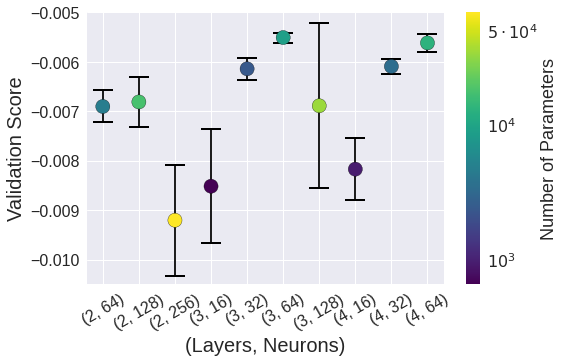

In [13]:
i_list = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
fig, ax = plt.subplots(figsize=(8,5))
#ax.grid()
ax.set_axisbelow(True)
ax.errorbar(range(len(scores[i_list])), scores[i_list], yerr=stds[i_list], color='black', capsize=10, capthick=2, fmt='.', zorder=1)
p = ax.scatter(range(len(scores[i_list])), scores[i_list], s=200, marker='o', cmap='viridis', c=weights[i_list], edgecolors='k', norm=colors.LogNorm(), zorder=2)
ax.set_xticks(range(len(scores[i_list])))
ax.set_xticklabels(pairs_str[i_list])
ax.set_ylim([-0.0105, -0.005])
ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel('Validation Score', fontsize=20)
ax.set_xlabel('(Layers, Neurons)', fontsize=20)
ax.tick_params(axis='x', rotation=30)
cbar = fig.colorbar(p, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.set_ticks([1e3, 1e4, 5e4])
cbar.set_ticklabels(['$10^3$', '$10^4$', '$5 \cdot 10^4$'])
cbar.set_label('Number of Parameters', fontsize=18)
fig.savefig('grid_search_layers.jpeg', dpi=300, bbox_inches='tight')

In [24]:
tuple([1, 3])

(1, 3)

In [18]:
a = (1, 3)
print(a)
print(*a)

(1, 3)
1 3
